# Exercise 1: Build and Plot k-Means


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 1:** create blobs with the size of 500, and center of 3

In [7]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=0.60, random_state=0)

**Step 2:** Plot the distribution of the blobs

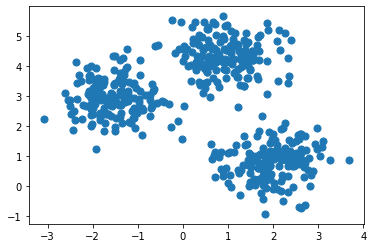

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=50);

**Step 3:** Use K-means, find the centers of these clusters

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Step 4:** Plot the blobs with the found centers

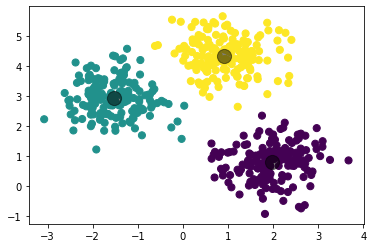

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

Step 5: How can you find out the automatically assigned "labels" in the produced clusters?

In [70]:
print(kmeans.labels_)

[2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 2 1 1 1 1 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1
 2 2 2 2 0 2 2 1 2 1 2 1 2 3 5 5 4 5 4 5 0 5 0 0 4 4 4 4 5 4 4 4 4 4 4 5 4
 5 5 5 5 4 4 4 4 4 4 4 5 5 4 4 4 4 5 4 0 4 4 4 5 0 4 5 4 3 5 5 3 0 3 5 3 5
 5 5 4 4 5 5 3 3 4 5 4 3 5 5 3 5 5 5 3 3 3 5 5 4 3 5 5 4 5 5 5 4 5 5 5 5 5
 5 4]


Step 6: How about classes? How to find out where there are classes.

In [69]:
kmeans.cluster_centers_

array([[4.94285714, 2.38571429],
       [5.37058824, 3.8       ],
       [4.828125  , 3.265625  ],
       [7.43846154, 3.13076923],
       [5.79210526, 2.70263158],
       [6.49534884, 3.00930233]])

# Exercise 2: k-Means with the Iris dataset


**Step 1:** Load the iris dataset from sklearn and other necessary libraries

In [103]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

**Step 2:** Set the training and target data as X and y respectively. Display the targets.

In [105]:
X = iris.data 
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Introducing - *the Elbow Method:*
A technique to allow you to identify the best K

General idea: iterate the creation of k-Means clusters with increasing sizes, and record down the value of kmeans.inertia_ (inertia_: Sum of squared distances of samples to their closest cluster center.)

**Step 3:** create a list named wcss and store the inertia values for a selected range of ks.

In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#initialize cluster and empty list
total_k = 10
wcss = []

#loop through desired number of clusters
for k in range(1, total_k):
    cluster = KMeans(k, random_state=0)
    cluster.fit(X)
    wcss.append(cluster.inertia_)

C:\Users\huimunte\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Step 4:** Plot a graph to look at 'The elbow'

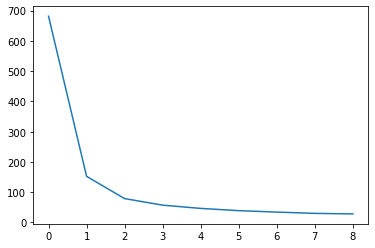

In [107]:
#plot graph
plt.plot(wcss)
plt.show()

**Step 5:** Apply the best K for your k-means clustering

In [108]:
cluster = KMeans(3, random_state=0)
cluster.fit(X)
y_pred = cluster.predict(X)

**Step 6:** Visualize the clusters. Name the clusters accordingly, and also plot the centriods.


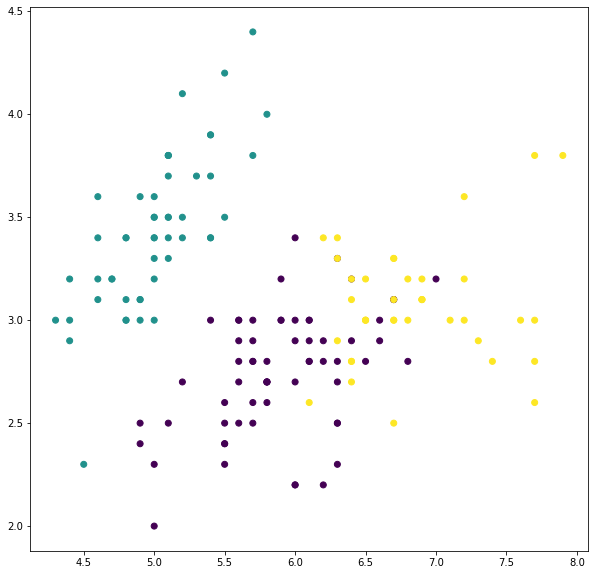

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

### Additional/Optional:

**Step 7:** Plot the actual and Predicted side by side

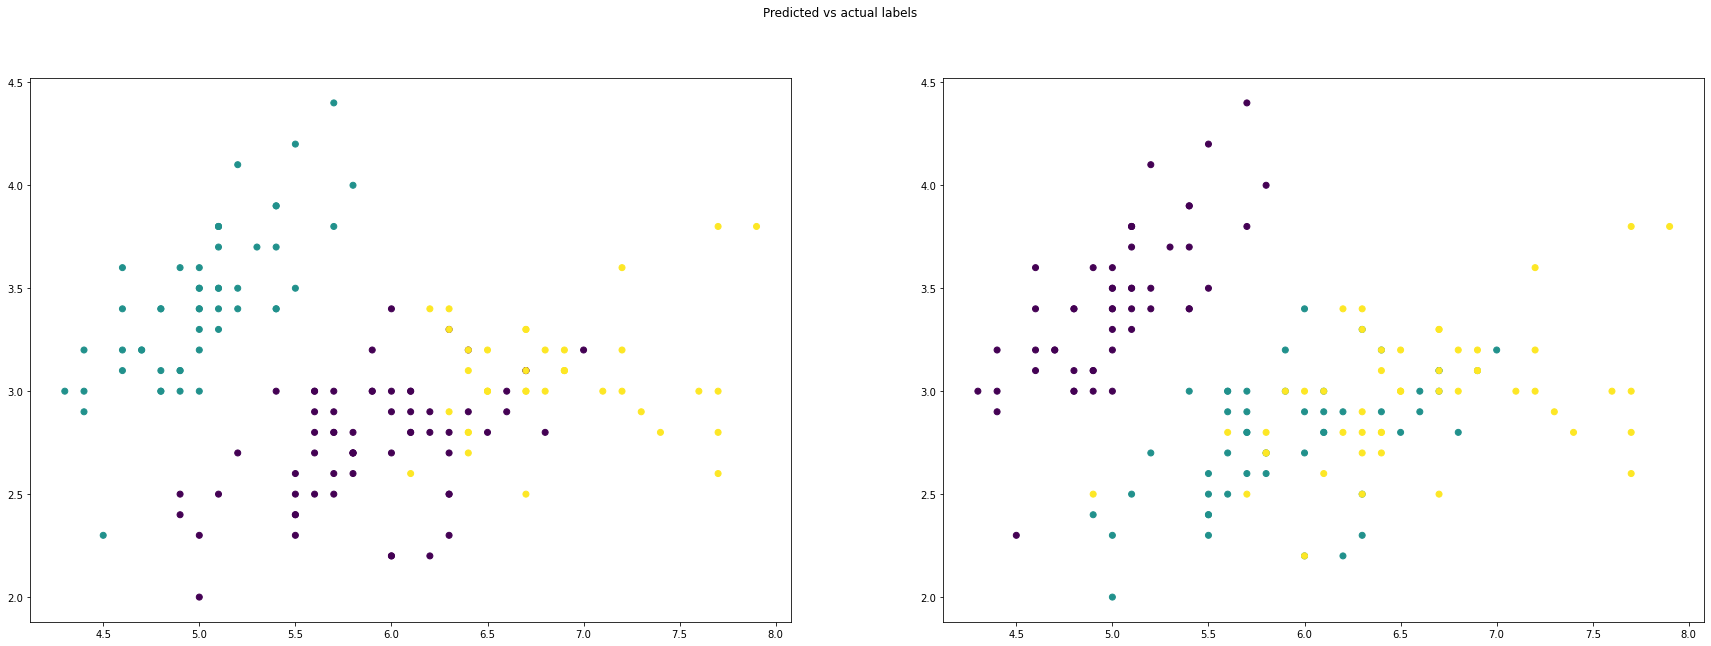

In [110]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

ax[0].scatter(X[:,0], X[:,1], c=y_pred)
ax[1].scatter(X[:,0], X[:,1], c=y)